# Modelando con datos, Pandas, visualización y ajuste de curvas!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

Vamos a aprender hoy como modelar datos experimentales. Vamos a hacer el proceso paso a paso para que entendamos lo que estamos haciendo y jugar (un poco) a científicos de datos y a científicos de laboratorio. Luego vamos a entender que hacer con nuestro propios datos.


**Data Set Information:** https://archive.ics.uci.edu/ml/datasets/wine+quality

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

In [2]:
data=pd.read_csv("../datas/winequality-white.csv",delimiter=";")

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
ii=data["density"]<1
data=data[ii]
data.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

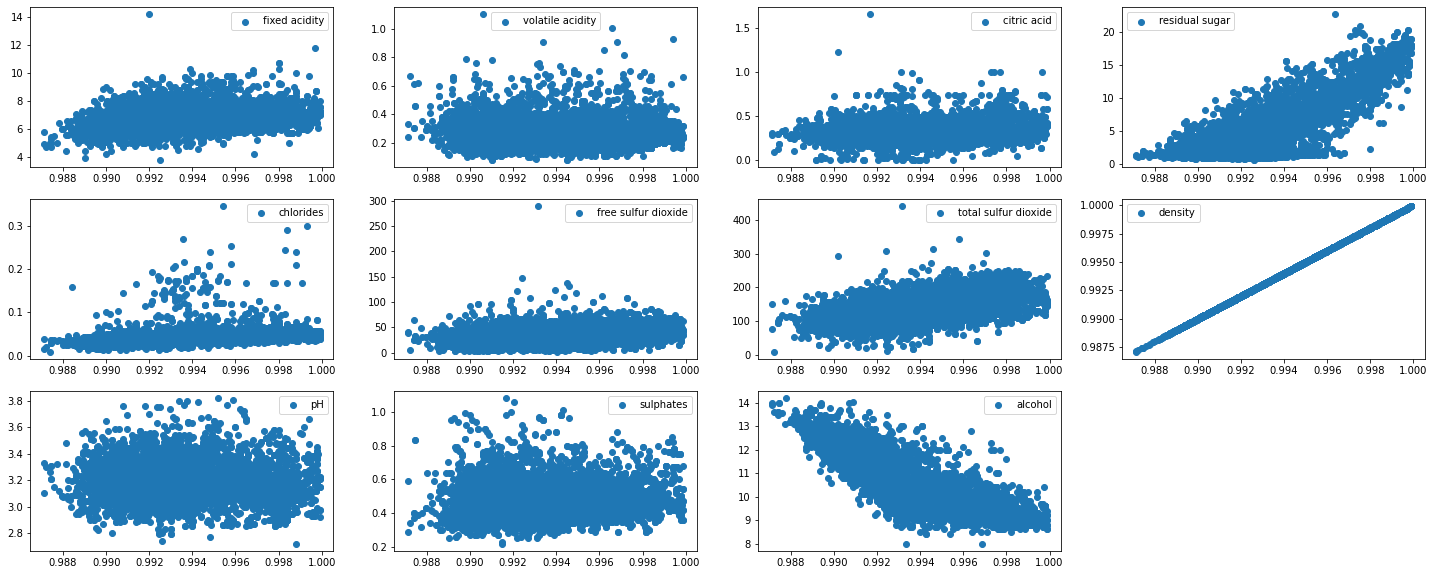

In [5]:
plt.figure(figsize=(25,10))
for i,j in enumerate(data.columns[:-1]):
    plt.subplot(3,4,i+1)
    plt.scatter(data["density"],data[j],label=j)
    plt.legend()
plt.show()

In [6]:
p=np.random.random(len(data[ii]))
kk=p<0.03

<ipython-input-6-bd1b7a23f6c5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p=np.random.random(len(data[ii]))


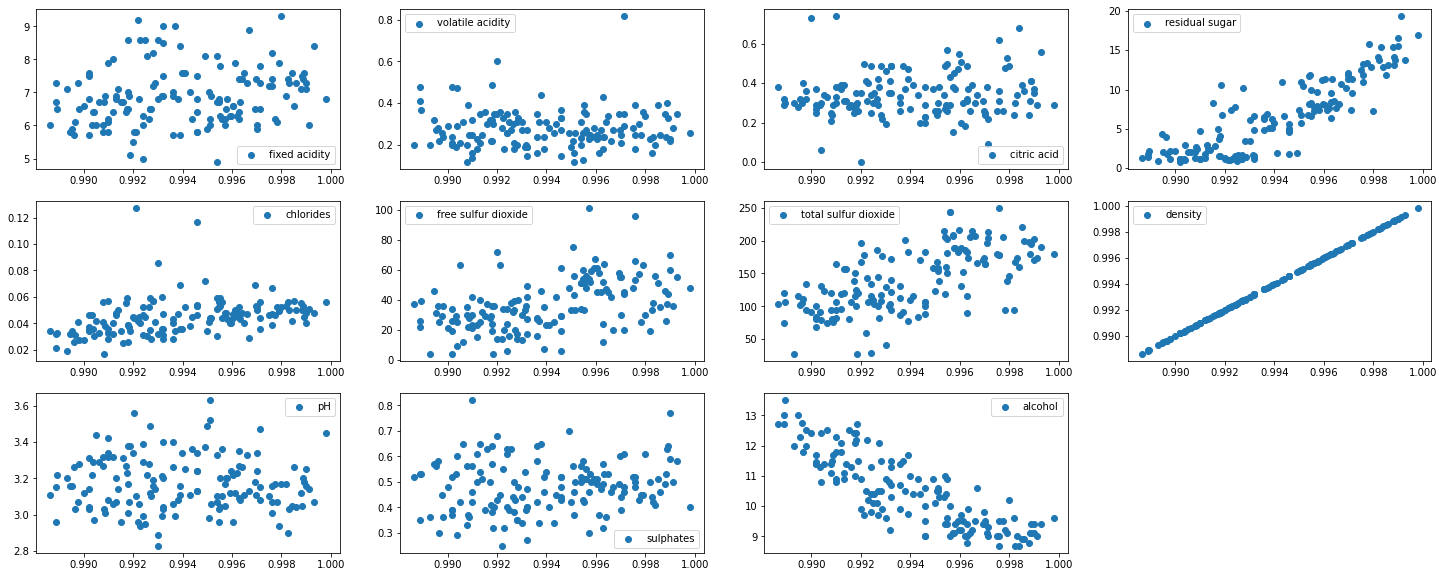

In [7]:
plt.figure(figsize=(25,10))
for i,j in enumerate(data.columns[:-1]):
    plt.subplot(3,4,i+1)
    plt.scatter(data["density"][kk],data[j][kk],label=j)
    plt.legend()
plt.show()

Vamos a enfocarnos en la relación de algunas de las variables por ejemplo:

| No | Variable independiente | Variable dependiente | Posible relación |
| --- | --- | --- | --- |
| 1 | Density | Total sulfur diaxide | Lineal |
| 2 | Density | alcohol | Lineal/cuadratic |
| 3 | Density | Residual sugar | Lineal/cuadratic |

In [8]:
from scipy.optimize import curve_fit

In [9]:
def func1(x, a, b):
    return a*x+b

def func2(x, a, b, c):
    return a*x**2+b*x+c

In [10]:
popt1, pcov1 = curve_fit(func1, data["density"], data["total sulfur dioxide"])
# Use: bounds=(0, [3., 1., 0.5])

In [11]:
popt1, pcov1

(array([ 8036.71200411, -7850.12652954]),
 array([[ 33827.21926905, -33620.43690292],
        [-33620.43690292,  33415.18099122]]))

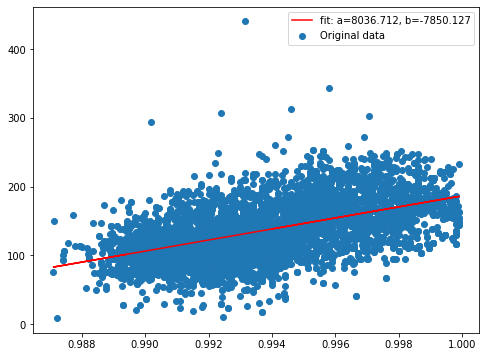

In [12]:
plt.figure(figsize=(8,6))
plt.plot(data["density"], func1(data["density"], *popt1), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt1))
plt.scatter(data["density"],data["total sulfur dioxide"],label="Original data")
plt.legend()
plt.show()

Vamos a automatizar todo esto.

In [13]:
def get_fit(func,xdata,ydata,labelx,labely,r):
    popt, pcov = curve_fit(func, xdata, ydata)
    popt, pcov = np.around(popt,r), np.around(np.sqrt(np.diag(pcov)),r)
    x=np.linspace(xdata.min(),xdata.max(),100)
    plt.figure(figsize=(8,6))
    plt.plot(x, func(x, *popt), 'r-',label=r'fit: {}$\pm${}'.format(np.around(tuple(popt),r),tuple(np.around(np.sqrt(np.diag(pcov)),r))))
    plt.scatter(xdata,ydata,label="Original data")
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.legend()
    plt.show()
    print("Coeficients are : {}".format(popt))
    print("Sigma_Coeficients are : {}".format(pcov))
    return #popt, np.sqrt(np.diag(pcov))

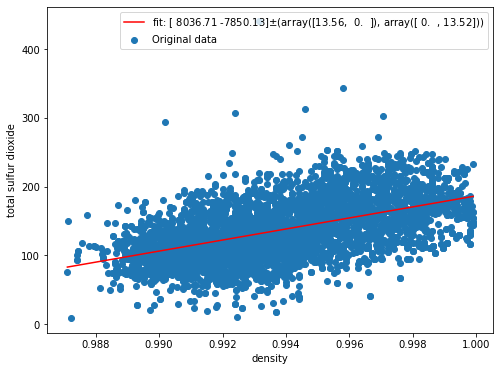

Coeficients are : [ 8036.71 -7850.13]
Sigma_Coeficients are : [183.92 182.8 ]


In [14]:
get_fit(func1,data["density"],data["total sulfur dioxide"],"density","total sulfur dioxide",2)

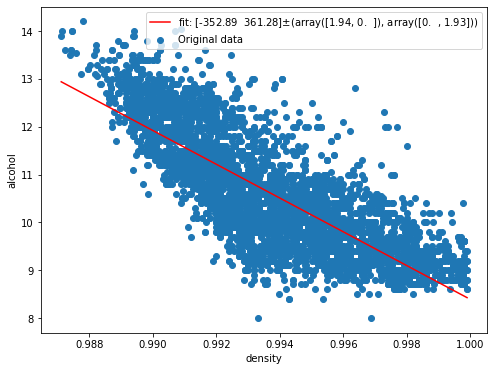

Coeficients are : [-352.89  361.28]
Sigma_Coeficients are : [3.77 3.74]


In [15]:
get_fit(func1,data["density"],data["alcohol"],"density","alcohol",2)

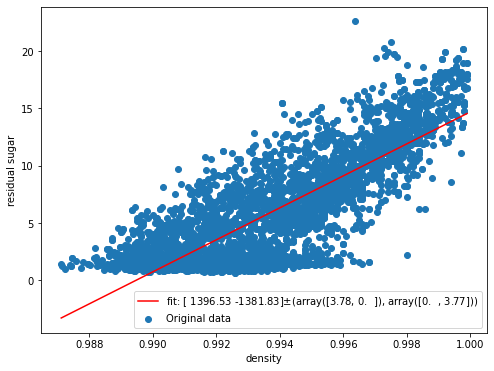

Coeficients are : [ 1396.53 -1381.83]
Sigma_Coeficients are : [14.27 14.18]


In [16]:
get_fit(func1,data["density"],data["residual sugar"],"density","residual sugar",2)

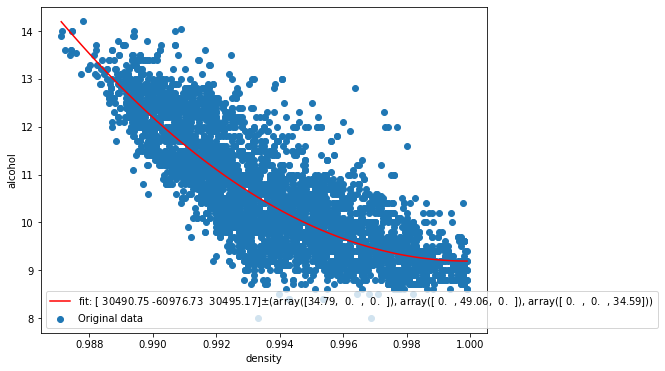

Coeficients are : [ 30490.75 -60976.73  30495.17]
Sigma_Coeficients are : [1210.34 2406.48 1196.18]


In [17]:
get_fit(func2,data["density"],data["alcohol"],"density","alcohol",2)

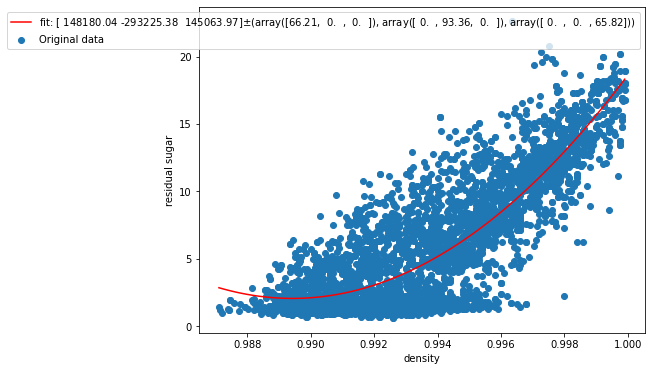

Coeficients are : [ 148180.04 -293225.38  145063.97]
Sigma_Coeficients are : [4383.66 8715.91 4332.37]


In [18]:
get_fit(func2,data["density"],data["residual sugar"],"density","residual sugar",2)

### ¿Cómo medimos el error de fit?

Quizas sea interesante usar una medida de error para estimar la disviación de los datos respecto del ajuste que hemos hecho. Por ejemplo, pordemo usar uno muy conocido:

\begin{equation}
Error=RMSE=\sqrt{\sum\frac{(y-y_{fit})^2}{N}}
\end{equation}

In [19]:
def get_fit2(func,xdata,ydata,labelx,labely,r):
    popt, pcov = curve_fit(func, xdata, ydata)
    popt, pcov = np.around(popt,r), np.around(pcov,r)
    x=np.linspace(xdata.min(),xdata.max(),100)
    E=np.sqrt(np.mean((ydata-func(xdata, *popt))**2))
    print("Error on fit is ={}".format(E))
    return popt, pcov

In [20]:
get_fit2(func2,data["density"],data["residual sugar"],"density","residual sugar",2)

Error on fit is =2.4753314547076255


(array([ 148180.04, -293225.38,  145063.97]),
 array([[ 19216478.61, -38207542.92,  18991575.13],
        [-38207542.92,  75967065.96, -37760537.69],
        [ 18991575.13, -37760537.69,  18769466.4 ]]))

In [21]:
get_fit2(func1,data["density"],data["residual sugar"],"density","residual sugar",2)

Error on fit is =2.7542082959315786


(array([ 1396.53, -1381.83]),
 array([[ 203.68, -202.43],
        [-202.43,  201.19]]))